# <font color='black'>EE25737: Introduction to Machine Learning</font>
## <font color='black'>Fall 99-00, Group 2</font>

### Arman Hafizi
### 95105516

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/dataset'

/content/drive/MyDrive/dataset


# Imports

In [28]:
import time
import random

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.utils.linear_assignment_ import linear_assignment

from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

# C4: Neural Networks

## Requirements

For installing Pytorch, run the following code: (if you don't use Jupter Notebook, first you should install pip command)

In [ ]:
pip install torch

Tensorflow:

In [ ]:
pip install tensorflow

For installing Keras, first you should install Tensorflow:

In [ ]:
pip install keras

## Load data

In [ ]:





## Code for loading the data

## C4.1.

In [ ]:
## Part 1.









## C4.2.

In [ ]:
## Part 2.








## C4.3.

In [ ]:
## Part 3.









# C5. Multi-class Classification

## Load data

In [ ]:
# read file
df = pd.read_csv('fashion-mnist.csv')

In [ ]:
# split X and Y
Y = df['y']
X = df.drop(labels=df.columns[-1], axis='columns', inplace=False)
# print(X)
# print(Y)

In [ ]:
# split train val test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)

## Assistive Functions

In [ ]:
def get_metrics(model, X_train, Y_train, X_test, Y_test):
    # check accracy on training set
    train_acc = model.score(X_train, Y_train)
    # predict on test on
    Y_pred = model.predict(X_test)
    # check accracy on test set
    test_acc = accuracy_score(Y_test, Y_pred)
    # create confusion matrix
    conf_mat = confusion_matrix(Y_test, Y_pred)
    return train_acc, test_acc, Y_pred, conf_mat

## C5.1. SVM with linear kernel

In [ ]:
# create the model
clf_5_1 = svm.SVC(kernel = 'linear')
# fit the model
clf_5_1.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# get metrics of the model
train_acc, test_acc, Y_pred, conf_mat = get_metrics(clf_5_1, X_train, Y_train, X_test, Y_test)
print('Train Accuracy: ', round(train_acc*100, 2))
print('Test Accuracy: ', round(test_acc*100, 2))
print('Predicted Values: ', Y_pred)
print('Confusion Matrix:\n', conf_mat)

Train Accuracy:  100.0
Test Accuracy:  81.12
Predicted Values:  [3 8 2 ... 5 5 6]
Confusion Matrix:
 [[384   6  14  18   6   0  60   0   5   0]
 [  4 462   5   5   0   0   0   0   0   0]
 [ 13   2 384   6  54   0  56   0   8   0]
 [ 43  22  10 381  10   0  12   0   2   0]
 [  6   0  95  19 325   0  52   0   3   0]
 [  0   1   0   0   0 433   0  42   4  15]
 [ 85   2  66  12  47   0 273   0   8   0]
 [  0   0   0   0   0  22   0 477   2  21]
 [  6   2   8   1   0   3  12   1 465   2]
 [  0   0   0   0   0  15   0  31   0 472]]


## C5.2. SVM with gaussian kernel

In [ ]:
best_acc = 0
best_gamma = 0
for i in range(10):
    g = (i+1) * 0.1
    # create the model
    clf = svm.SVC(gamma = g, kernel = 'rbf')
    # fit the model
    clf.fit(X_train, Y_train)
    # get metrics of the model
    train_acc, test_acc, Y_pred, conf_mat = get_metrics(clf, X_train, Y_train, X_test, Y_test)
    print('Gamma: ', g)
    print('Train Accuracy: ', round(train_acc*100, 2))
    print('Test Accuracy: ', round(test_acc*100, 2))
    print('Predicted Values: ', Y_pred)
    print('Confusion Matrix:\n', conf_mat)
    print('-----------------------------------------------------------------')
    # update best gamma
    if test_acc > best_acc:
        best_acc = test_acc
        best_gamma = g

Gamma:  0.1
Train Accuracy:  100.0
Test Accuracy:  9.6
Predicted Values:  [3 3 3 ... 3 3 3]
Confusion Matrix:
 [[  0   0   0 493   0   0   0   0   0   0]
 [  0   0   0 476   0   0   0   0   0   0]
 [  0   0   0 523   0   0   0   0   0   0]
 [  0   0   0 480   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0 495   0   0   0   0   0   0]
 [  0   0   0 493   0   0   0   0   0   0]
 [  0   0   0 522   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0 518   0   0   0   0   0   0]]
-----------------------------------------------------------------
Gamma:  0.2
Train Accuracy:  100.0
Test Accuracy:  9.6
Predicted Values:  [3 3 3 ... 3 3 3]
Confusion Matrix:
 [[  0   0   0 493   0   0   0   0   0   0]
 [  0   0   0 476   0   0   0   0   0   0]
 [  0   0   0 523   0   0   0   0   0   0]
 [  0   0   0 480   0   0   0   0   0   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0 495   0   0   0   0   0   0]
 [  0   0   0 493   0  

In [ ]:
print('Best Gamma: ', best_gamma)
print('Best Accuracy on test set: ', round(100*best_acc, 2))

Best Gamma:  0.1
Best Accuracy on test set:  9.6


## C5.3. K-nearest neighbor

In [ ]:
best_acc = 0
best_k = 0
for i in range(15):
    k = i+1
    # create the model
    knn = KNeighborsClassifier(n_neighbors = k) # default distance metric is already Euclidean
    # fit the model
    knn.fit(X_train, Y_train)
    # get metrics of the model
    train_acc, test_acc, Y_pred, conf_mat = get_metrics(knn, X_train, Y_train, X_test, Y_test)
    print('K (Number of Neighbors): ', k)
    print('Train Accuracy: ', round(train_acc*100, 2))
    print('Test Accuracy: ', round(test_acc*100, 2))
    print('Predicted Values: ', Y_pred)
    print('Confusion Matrix:\n', conf_mat)
    print('-----------------------------------------------------------------')
    # update best gamma
    if test_acc > best_acc:
        best_acc = test_acc
        best_k = k

K (Number of Neighbors):  1
Train Accuracy:  100.0
Test Accuracy:  79.26
Predicted Values:  [0 8 2 ... 5 5 0]
Confusion Matrix:
 [[374   3  14  14   3   0  80   0   5   0]
 [  6 456   5   6   0   0   3   0   0   0]
 [ 10   0 342   3  87   0  80   0   1   0]
 [ 38  10  10 374  27   0  20   0   1   0]
 [  0   0  72  27 326   0  75   0   0   0]
 [  1   0   0   0   1 371   1  65   5  51]
 [ 83   1  61  13  43   0 288   0   4   0]
 [  0   0   0   0   0   4   0 467   2  49]
 [  4   0  12   3   2   0   5   5 469   0]
 [  0   0   0   0   0   3   0  17   2 496]]
-----------------------------------------------------------------
K (Number of Neighbors):  2
Train Accuracy:  90.86
Test Accuracy:  80.16
Predicted Values:  [0 8 2 ... 5 5 0]
Confusion Matrix:
 [[434   2  19  12   1   0  21   0   4   0]
 [  8 457   6   3   0   0   2   0   0   0]
 [ 17   0 409   7  60   0  30   0   0   0]
 [ 51  18  13 379  13   0   6   0   0   0]
 [  0   0 129  39 314   0  18   0   0   0]
 [  2   0   0   3   1 411   1 

In [ ]:
print('Best K: ', best_k)
print('Best Accuracy on test set: ', round(100*best_acc, 2))

Best K:  4
Best Accuracy on test set:  81.08


## C5.4. Decision trees

In [ ]:
# create the model
tree = DecisionTreeClassifier()
# fit the model
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# get metrics of the model
train_acc, test_acc, Y_pred, conf_mat = get_metrics(tree, X_train, Y_train, X_test, Y_test)
print('Train Accuracy: ', round(train_acc*100, 2))
print('Test Accuracy: ', round(test_acc*100, 2))
print('Predicted Values: ', Y_pred)
print('Confusion Matrix:\n', conf_mat)

Train Accuracy:  100.0
Test Accuracy:  73.48
Predicted Values:  [5 8 6 ... 5 5 0]
Confusion Matrix:
 [[331   2  12  37   7   4  96   1   3   0]
 [  4 426   5  26   5   1   7   0   2   0]
 [ 21   1 317   3  92   0  77   1  11   0]
 [ 30  27   8 351  28   1  25   0   7   3]
 [  7  10  92  30 279   0  73   0   8   1]
 [  1   1   0   1   1 418   1  34  18  20]
 [ 65   2  62  20  53   1 279   1  10   0]
 [  0   0   0   0   0  48   0 422   8  44]
 [  1   4   9  10   7  16  15   3 433   2]
 [  1   1   0   2   1  20   1  67   7 418]]


## C5.5. Neural network

In [ ]:
acts = ['relu', 'sigmoid', 'softmax', 'tanh', 'exponential']
# create the models
model = []
for act1 in acts:
    for act2 in acts:
        m = Sequential()
        m.add(Dense(100, input_dim = 784, activation = act1))
        m.add(Dense(100, activation = act2))
        m.add(Dense(10, activation = 'softmax'))
        model.append(m)

In [ ]:
# compile the models
for m in model:
    m.compile(loss = 'categorical_crossentropy', optimizer = SGD(), metrics=['accuracy'])
    # m.summary()

In [ ]:
# fit the models
info = []
for m in model:
    i = m.fit(X_train, to_categorical(Y_train), validation_data=(X_test, to_categorical(Y_test)), epochs=50, verbose = 1)
    info.append(i)

Epoch 1/50
157/157 [==============================] - 1s 6ms/step - loss: 14154.9907 - accuracy: 0.1087 - val_loss: 2.4388 - val_accuracy: 0.0964
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 2.3017 - accuracy: 0.1057 - val_loss: 2.4389 - val_accuracy: 0.0964
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1128 - val_loss: 2.4390 - val_accuracy: 0.0964
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1120 - val_loss: 2.4392 - val_accuracy: 0.0964
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 2.3002 - accuracy: 0.1085 - val_loss: 2.4394 - val_accuracy: 0.0964
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 2.3009 - accuracy: 0.1072 - val_loss: 2.4395 - val_accuracy: 0.0964
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 2.3001 - accuracy: 0.1043 - val_loss: 2.4397 - val_accuracy: 0.0964
Ep

In [ ]:
# get accuracy
best_acc = 0
best_act = ''
best_m = 0
for m in range(len(model)):
    # predict on test
    Y_pred = np.argmax(model[m].predict(X_test), axis = 1)
    conf_mat = confusion_matrix(Y_test, Y_pred)
    # get accuracy
    _, train_acc = model[m].evaluate(X_train, to_categorical(Y_train), verbose=0)
    _, test_acc = model[m].evaluate(X_test, to_categorical(Y_test), verbose=0)
    a = acts[int(m/5)] + '-' + acts[m%5]
    print('Activations: ', a)
    print('Train Accuracy: ', round(train_acc*100, 2))
    print('Test Accuracy: ', round(test_acc*100, 2))
    print('Predicted Values: ', Y_pred)
    print('Confusion Matrix:\n', conf_mat)
    print('---------------------------------')
    if test_acc > best_acc:
        best_acc = test_acc
        best_act = a
        best_m = m

Activations:  relu-relu
Train Accuracy:  10.74
Test Accuracy:  9.64
Predicted Values:  [3 3 3 ... 3 3 3]
Confusion Matrix:
 [[  0   0   0 493   0   0   0   0   0   0]
 [  0   0   0 476   0   0   0   0   0   0]
 [  0   0   0 523   0   0   0   0   0   0]
 [  0   0   0 479   0   0   0   0   1   0]
 [  0   0   0 500   0   0   0   0   0   0]
 [  0   0   0 493   0   0   0   0   2   0]
 [  0   0   0 493   0   0   0   0   0   0]
 [  0   0   0 522   0   0   0   0   0   0]
 [  0   0   0 497   0   0   0   0   3   0]
 [  0   0   0 518   0   0   0   0   0   0]]
---------------------------------
Activations:  relu-sigmoid
Train Accuracy:  86.14
Test Accuracy:  83.62
Predicted Values:  [2 8 2 ... 5 5 0]
Confusion Matrix:
 [[422   3  11  11   2   0  33   0  11   0]
 [  2 451  10   9   2   0   1   0   1   0]
 [  8   0 426   4  34   0  38   0  13   0]
 [ 33   4  10 398  12   0  20   0   3   0]
 [  0   0 117   8 317   0  56   0   2   0]
 [  1   0   0   0   0 447   1  22  10  14]
 [ 96   2  61   1  25   0

In [ ]:
print('Best Activations: ', best_act)
print('Best Accuracy on test set: ', round(100*best_acc, 2))

Best Activations:  relu-sigmoid
Best Accuracy on test set:  83.62


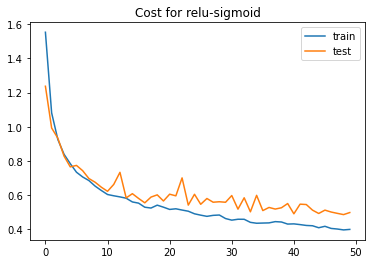

In [ ]:
# graph cost function
plt.title('Cost for ' + best_act)
plt.plot(info[best_m].history['loss'], label='train')
plt.plot(info[best_m].history['val_loss'], label='test')
plt.legend()
plt.show()

# C6. K-means

## Load data

In [5]:
# read file
df = pd.read_csv('iris.csv')

In [33]:
# split X and Y
Y = df['variety'].to_numpy()
X = df.drop(labels=df.columns[-1], axis='columns', inplace=False).to_numpy()
# print(X)
# print(Y)

## C6.1. Algorithm

In [57]:
def k_means(matrix, k, max_iterations = 100):
    random.seed(37) # get same random numbers each run
    n, m = matrix.shape # get m and n
    means = np.zeros(shape = (k, m)) # means of clusters
    r = random.sample(range(n), k) # get k initial points
    for i in range(k):
        means[i] = matrix[r[i]] # set k points as means
    clusters = [] # each cluster have some points
    iter = 0 # initialize iteration
    while iter < max_iterations:
        # update clustering
        new_clusters = []
        for i in range(k):
            new_clusters.append([])
        for i in range(n):
            min_dist = float('inf')
            c = 0
            for j in range(k):
                dist = np.linalg.norm(matrix[i] - means[j]) # Euclidean distance between point i and mean j
                if dist < min_dist:
                    min_dist = dist
                    c = j
            new_clusters[c].append(i) # assign point i to its nearest cluster
        # recalculate means
        diff = 0
        for j in range(k):
            # create a numpy array for each cluster using actual point values, not point number
            c = []
            for i in range(len(new_clusters[j])):
                c.append(matrix[new_clusters[j][i]])
            c = np.array(c)
            # get mean of the cluster
            means[j] = np.average(c, axis = 0)
            # check if no change
            if iter == 0: # ignore 1st iteration
                continue
            if set(new_clusters[j]) == set(clusters[j]): # same clustering for class[j]
                diff += 1
        if diff == k: # no change in clustering
            break
        # keep old clustering
        clusters = new_clusters
        # next interation
        iter += 1
    return clusters

In [58]:
k = 3 # set number of expected clusters
c = k_means(X, k) # get clustering
print(c)

[[51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 106, 113, 114, 119, 121, 123, 126, 127, 133, 138, 142, 146, 149], [50, 52, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]]


## C6.2. Plot clusters in 2d

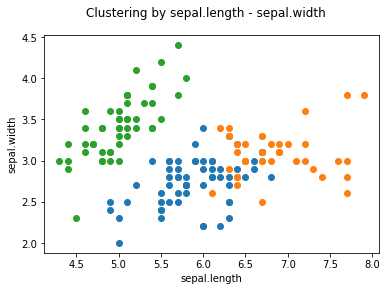

----------------------------------------------------------------------------------


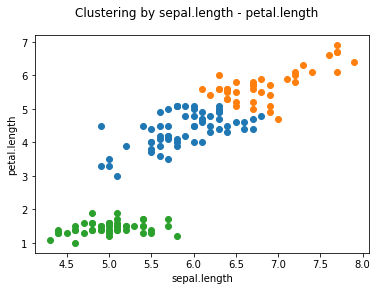

----------------------------------------------------------------------------------


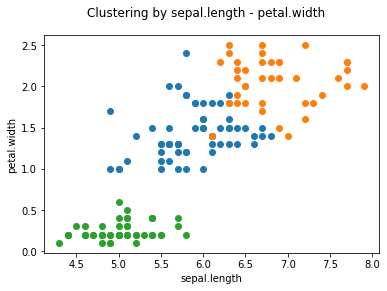

----------------------------------------------------------------------------------


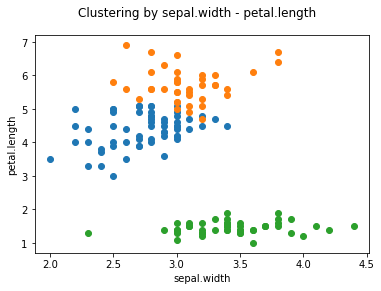

----------------------------------------------------------------------------------


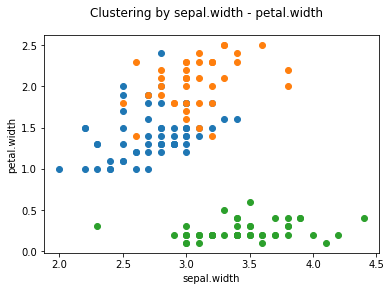

----------------------------------------------------------------------------------


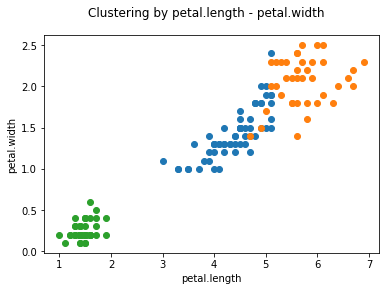

----------------------------------------------------------------------------------


In [59]:
n, m = X.shape # get n and m
labels = df.columns.values # get feature names
for i in range(m):
    for j in range(i+1, m):
        fig = plt.figure()
        for l in range(k):
            plt.scatter(*X[c[l]][:, [i, j]].T)
        plt.xlabel(labels[i])
        plt.ylabel(labels[j])
        fig.suptitle('Clustering by ' + labels[i] + ' - ' + labels[j])
        plt.show()
        print('----------------------------------------------------------------------------------')

## C6.3. Redundant feature

In [71]:
def cluster_acc(Y_true, Y_pred): # calculate accuracy of a clustering based on true and predicted values
    Y_true = Y_true.astype(np.int64)
    assert Y_pred.size == Y_true.size
    D = max(Y_pred.max(), Y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(Y_pred.size):
        w[Y_pred[i], Y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / Y_pred.size

In [77]:
# get unique output types
y_labels = np.unique(Y)
# make a dictionary mapping labels to integers
d = dict(zip(list(y_labels), range(1, k+1))) 
# map real values to numeric values
Y_numeric = np.vectorize(d.get)(Y)

In [93]:
# get accuracy for the clustering
c = k_means(X, k)
Y_pred = [] # get predicted values of clustering
for i in range(n):
    for j in range(k):
        if i in c[j]: 
            Y_pred.append(j+1)
            break
# get accuracy of clustering
acc = cluster_acc(np.array(Y_numeric), np.array(Y_pred)) 
print('clustering accuracy with ALL features: ', round(acc*100, 2))

clustering accuracy with ALL features:  88.67


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [94]:
# repeat procedure using m-1 features
for f in range(m):
    # all features except feature f
    features = list(range(m))
    features.remove(f)
    X_this = X[:, features] # filter X using new features
    # print(X_this)
    c = k_means(X_this, k) # get clustering for the new set of X
    # get predicted values of clustering
    Y_pred = []
    for i in range(n):
        for j in range(k):
            if i in c[j]: 
                Y_pred.append(j+1)
                break
    # get accuracy of clustering
    acc = cluster_acc(np.array(Y_numeric), np.array(Y_pred)) 
    print('clustering accuracy WITHOUT feature ' + labels[f] + ': ', round(acc*100, 2))

clustering accuracy WITHOUT feature sepal.length:  95.33
clustering accuracy WITHOUT feature sepal.width:  90.67
clustering accuracy WITHOUT feature petal.length:  82.67
clustering accuracy WITHOUT feature petal.width:  88.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
